In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
x,y = make_classification(n_samples=400,n_features=2,random_state = 3,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=1)

In [3]:
y[y==0] = -1
print(x.shape,y.shape)


(400, 2) (400,)


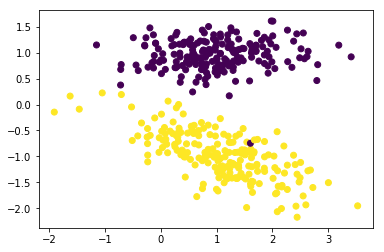

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
def hypothesis(x,w,b,label):
    return label*(np.dot(w,x)+b)


def loss(x,y,w,b,c):
    loss=0
    for ix in range(x.shape[0]):
        hp = hypothesis(x[ix],w,b,y[ix])
        loss+=max(1-hp,0)
    w2norm = np.dot(w,w)
    loss = (w2norm/2) + c*loss
    return loss


def gradient(x,y,w,b,c):
    wgr = np.zeros(w.shape)
    bgr = 0;
    for ix in range(x.shape[0]):
        ti = hypothesis(x[ix],w,b,y[ix])
        if(ti>=1):
            continue
        else:
            wgr += (-1)*y[ix]*x[ix]
            bgr += (-1)*y[ix]
    wgr = w + c*(wgr)
    bgr = c*bgr
    return wgr,bgr

def gradientdescent(x,y,c,lr):
    w = np.zeros((x.shape[1]))
    b = 0
    los = []
    
    for ix in range(500):
        wgr,bgr = gradient(x,y,w,b,c)
         
        w = w - lr*wgr
        b = b - lr*bgr
        
        los.append(loss(x,y,w,b,c))
    
    return los,w,b
    
    

In [6]:
fl,wt,bi = gradientdescent(x,y,1,0.001)

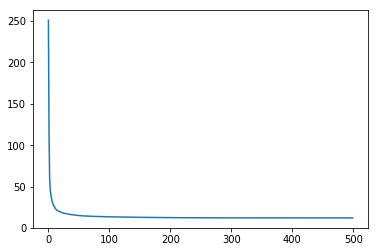

In [7]:
plt.plot(fl)

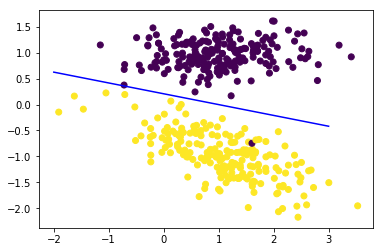

In [8]:
xplot = np.linspace(-2,3)
plt.figure(0)
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(xplot,-(bi+(wt[0]*xplot))/wt[1],c='b')